In [4]:
import pandas as pd
import numpy as np
from acquire_zillow import *

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

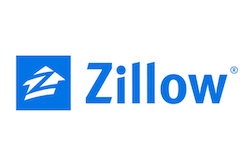

Detected zillow_data.csv - use csv (1) or gather new data (2)? 1
--- Beginning CSV Import --

--- CSV Import Complete --



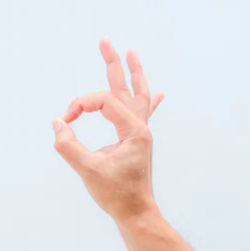

Shape of DataFrame: (167854, 59)


In [36]:
dfm = acquire_zillow()

In [48]:
df = dfm[['calculatedfinishedsquarefeet']]
df.dropna(inplace=True)
df.calculatedfinishedsquarefeet.astype(int, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166992 entries, 0 to 167853
Data columns (total 1 columns):
calculatedfinishedsquarefeet    166992 non-null float64
dtypes: float64(1)
memory usage: 2.5 MB


In [52]:
df[['sqft']] = df[['calculatedfinishedsquarefeet']]
df.drop(columns='calculatedfinishedsquarefeet', inplace=True)

In [53]:
df.describe()

,sqft
count,166992.000000
mean,1778.630246
std,940.356025
min,2.000000
25%,1183.000000
50%,1541.000000
75%,2103.000000
max,35640.000000


In [116]:
def iqr_outliers(s, k=1.5, drop=False):
    '''
    df = your dataframe;
    k = cutoff (default=1.5);
    drop = perform drop (default=False)'''
    q1 = df[s].quantile(.25)
    q3 = df[s].quantile(.75)
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    lower_bound = q1 - k * iqr
    print(f'DataFrame {s} has a total count of {df[s].size}\n')
    print(f'Count of UpperBound: {(df[s] > upper_bound).sum()}')
    print(f'Count of LowerBound: {(df[s] < lower_bound).sum()}')
    if drop == True:
        df[s] = df[s] >lower_bound & df[s] < upper_bound
        return df.s

In [117]:
cols = ['sqft']
iqr_outliers(cols, k=2, drop=True)

DataFrame ['sqft'] has a total count of 166992

Count of UpperBound: sqft    5199
dtype: int64
Count of LowerBound: sqft    0
dtype: int64


TypeError: Could not operate array([-657.]) with block values couldn't find matching opcode for 'and_bdd'

In [75]:
166992-5199

161793

In [76]:
df.shape

(166992, 1)

In [ ]:
def quantile_outliers(s, k=.01, drop=False):
    
    upper_q = 1 - k
    lower_q = 0 + k
    